In [1]:
#Importing all the libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import timeit


In [2]:
# Load the CSV file to a Pandas Dataframe

df=pd.read_csv("movie_metadata.csv")


In [3]:
#Max length of the dataframe

len(df)


5043

In [4]:
#Display the columns. Total 28 Columns.

df.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
#column counts substracting from total length. If different, means missing data.

len(df)- df.count()

#So no missing data for genres, movie_title, num_voted_users, cast_total_facebook_likes, movie_imdb_link,
#imdb_score, movie_facebook_likes

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
#Applying Describe method to understand all statistical values for all the numeric fields.

df['imdb_score'].describe()

#imdb_score has max value of 9.5 and minimum value of 1.6 out of 10 for all the movies in the dataframe with a 
#mean of 6.44 having standard deviation of 1.125.

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

In [7]:
#Applying Describe method to understand all statistical values for all the numeric fields.

df.describe()



,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

(array([   2.,    3.,    2.,    6.,    3.,    4.,    8.,    9.,    9.,
           8.,   24.,   12.,   29.,   23.,   14.,   44.,   20.,   56.,
          71.,   31.,  104.,   42.,  139.,   92.,  202.,  229.,  124.,
         275.,  179.,  351.,  185.,  387.,  404.,  174.,  365.,  195.,
         331.,  264.,  114.,  181.,   75.,  111.,   40.,   53.,   28.,
           7.,    8.,    3.,    2.,    1.]),
 array([ 1.6  ,  1.758,  1.916,  2.074,  2.232,  2.39 ,  2.548,  2.706,
         2.864,  3.022,  3.18 ,  3.338,  3.496,  3.654,  3.812,  3.97 ,
         4.128,  4.286,  4.444,  4.602,  4.76 ,  4.918,  5.076,  5.234,
         5.392,  5.55 ,  5.708,  5.866,  6.024,  6.182,  6.34 ,  6.498,
         6.656,  6.814,  6.972,  7.13 ,  7.288,  7.446,  7.604,  7.762,
         7.92 ,  8.078,  8.236,  8.394,  8.552,  8.71 ,  8.868,  9.026,
         9.184,  9.342,  9.5  ]),
 <a list of 50 Patch objects>)

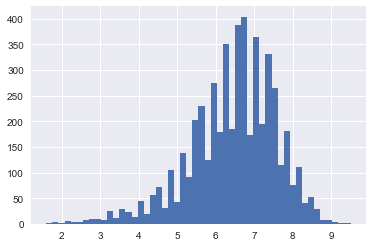

In [9]:
#Histogram of IMDB Movie Score

plt.hist(df.imdb_score.dropna(),bins=50)

#df['imdb_score'].plot(kind='hist', title='HISTOGRAM OF IMDB MOVIE SCORE(1-10)',bins=150)


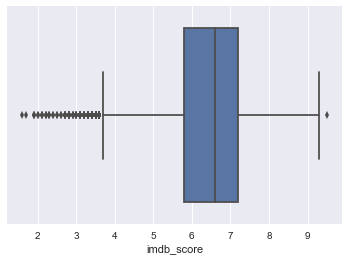

In [10]:
#boxplot of IMDB_SCORE
sns.boxplot(df.imdb_score.dropna())

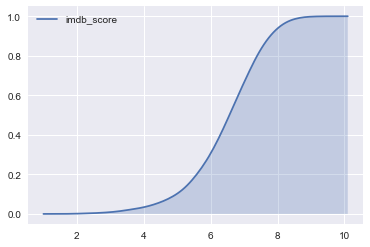

In [11]:
#Kernel Density Estimate Plot for IMDB_SCORE
sns.kdeplot(df.imdb_score,shade=True,cumulative=True)

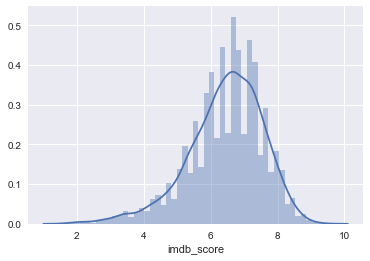

In [12]:
sns.distplot(df.imdb_score)

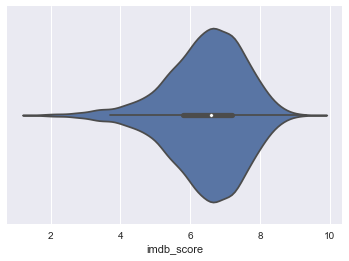

In [13]:
#violinplot

sns.violinplot(df.imdb_score)

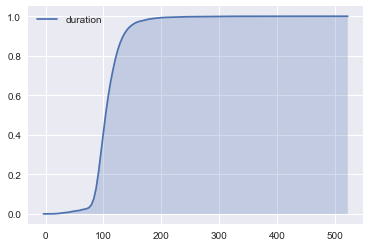

In [14]:
#KDE of duration

sns.kdeplot(df.duration.dropna(),cumulative=True,shade=True)


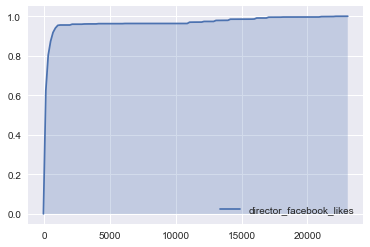

In [15]:
#KDE OF director_facebook_likes

sns.kdeplot(df.director_facebook_likes.dropna(),cumulative=True,shade=True)

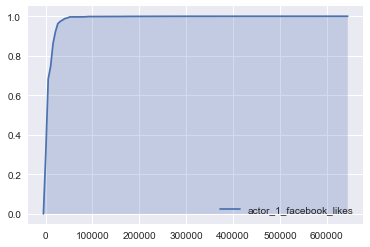

In [16]:
#KDE OF actor_1_facebook_likes

sns.kdeplot(df.actor_1_facebook_likes.dropna(),cumulative=True,shade=True)

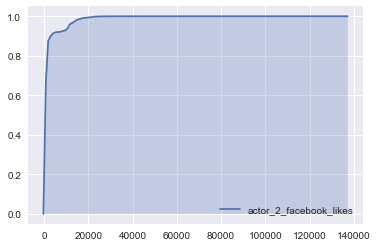

In [17]:
#KDE OF actor_2_facebook_likes

sns.kdeplot(df.actor_2_facebook_likes.dropna(),cumulative=True,shade=True)

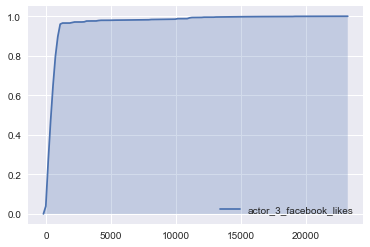

In [18]:
#KDE OF actor_3_facebook_likes

sns.kdeplot(df.actor_3_facebook_likes.dropna(),cumulative=True,shade=True)

C:\Users\Amrita\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


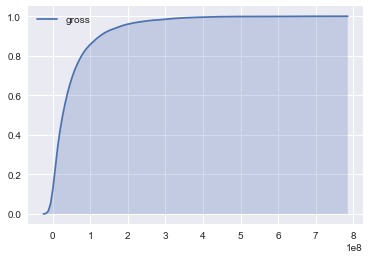

In [19]:
#KDE OF gross VS Budget

sns.kdeplot(df.gross.dropna(),cumulative=True,shade=True)
#sns.kdeplot(df.budget.dropna(),cumulative=True,shade=True)

In [20]:
# IMDB SCORE will be my pridected output variable. Float Variable.

# Check to see if imdb_score field is having any missing values or not.

df[df['imdb_score'] < 1]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes


In [21]:
df[df['imdb_score'] < 0]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes


In [22]:
len(df[df['imdb_score'].notnull()])

5043

In [23]:
len(df[df['imdb_score'].isnull()])


0

In [24]:
len(df)- df.count()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [25]:
# Define Function which will determine missing value percentages for any Data Fields

def missval_chk(data):
    missval_cnt = len(df)- df.count()
    isnull_count = len(df[df[data].isnull()])
    if len(df)> 0:
        percent = ((missval_cnt[data]/len(df)) * 100)
    else:
        percent = 0.0
    return isnull_count, percent

def function(*args):
    for arg in args:
        print("Missing value count,percent for " + arg + " col: " + str(missval_chk(arg)))
       

In [26]:
function('duration','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes',
             'director_facebook_likes','imdb_score')

Missing value count,percent for duration col: (15, 0.29744199881023198)
Missing value count,percent for actor_1_facebook_likes col: (7, 0.13880626611144162)
Missing value count,percent for actor_2_facebook_likes col: (13, 0.25778306563553438)
Missing value count,percent for actor_3_facebook_likes col: (23, 0.45607773150902242)
Missing value count,percent for director_facebook_likes col: (104, 2.062264525084275)
Missing value count,percent for imdb_score col: (0, 0.0)


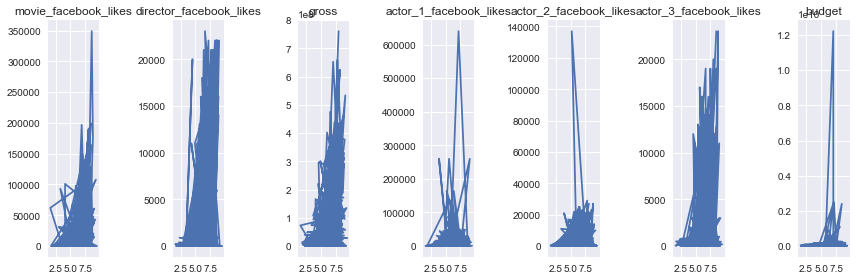

In [27]:

fig, axes = plt.subplots(1, 7, figsize=(12, 4))

axes[0].plot(df['imdb_score'], df['movie_facebook_likes'])
axes[0].set_title("movie_facebook_likes")

axes[1].plot(df['imdb_score'], df['director_facebook_likes'])
axes[1].axis('tight')
axes[1].set_title("director_facebook_likes")

axes[2].plot(df['imdb_score'], df['gross'])
axes[2].set_title("gross")

axes[3].plot(df['imdb_score'], df['actor_1_facebook_likes'])
axes[3].set_title("actor_1_facebook_likes")

axes[4].plot(df['imdb_score'], df['actor_2_facebook_likes'])
axes[4].axis('tight')
axes[4].set_title("actor_2_facebook_likes")

axes[5].plot(df['imdb_score'], df['actor_3_facebook_likes'])
axes[5].set_title("actor_3_facebook_likes")

axes[6].plot(df['imdb_score'], df['budget'])
axes[6].set_title("budget")

plt.tight_layout()

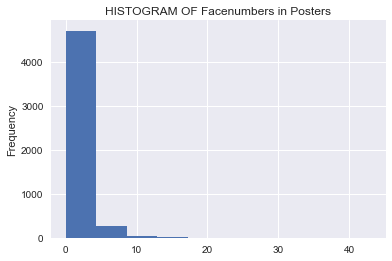

In [28]:
#Histogram of facenumber_in_poster

df['facenumber_in_poster'].plot(kind='hist', title='HISTOGRAM OF Facenumbers in Posters')

#nearly 95% of all the 4096 posters have less than 5 faces.

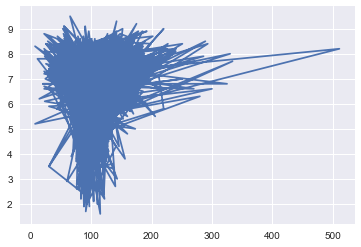

In [29]:
plt.plot(df['duration'], df['imdb_score'])

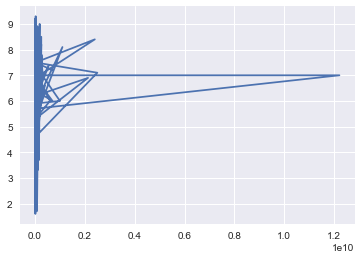

In [30]:
plt.plot(df['budget'], df['imdb_score'] )

# check % of total # of rows we'll have to drop across all 4 cols

In [31]:
# My output column is imdb_score.
# No missing values for imdb_score, so no rows dropping for this. Total rows are 5043.

In [32]:
#My three choosen input columns are
#director_facebook_likes(104 rows)
#actor_1/2/3_facebook_likes(Total 43 rows)
#duration(15 rows)

In [33]:
#Dataframe copied to a new one for dropping/manipulation purpose.
df_copy= df.copy()

In [34]:
# Writing a function which will determine % of rows dropped for these input and output variables selected.

def droprows_det(arg1,arg2,arg3,arg4,arg5,arg6):
    
        counter=len(df_copy) 
        print("Total Number of rows for the dataframe: " + str(counter))
        #print("Missing value count,percent for duration col: " + str(missval_chk('duration'))
    
        df_copy1= df_copy[df_copy[arg1].notnull()]  
        percent1= ((counter - len(df_copy1))/ counter)*100
        counter1=len(df_copy1) 
        print("% of rows(" + str(counter-counter1)+ ") dropped for " + arg1 + " column " + " is : " + str(percent1))
        print("New dataframe size is: "  + str(counter1))
        
        df_copy2= df_copy1[df_copy1[arg2].notnull()]
        percent2= ((counter1 - len(df_copy2))/ counter1)*100
        counter2=len(df_copy2)
        print("% of rows(" + str(counter1-counter2)+ ") dropped for " + arg2 + " column " + " is : " + str(percent2))
        print("New dataframe size is: "  + str(counter2))
        
                
        df_copy3= df_copy2[df_copy2[arg3].notnull()] 
        percent3= ((counter2 - len(df_copy3))/ counter2)*100
        counter3=len(df_copy3)
        print("% of rows(" + str(counter2-counter3)+ ") dropped for " + arg3 + " column " + " is : " + str(percent3))
        print("New dataframe size is: "  + str(counter3))
                
        df_copy4= df_copy3[df_copy3[arg4].notnull()] 
        percent4= ((counter3 - len(df_copy4))/ counter3)*100
        counter4=len(df_copy4)
        print("% of rows(" + str(counter3-counter4)+ ") dropped for " + arg4 + " column " + " is : " + str(percent4))
        print("New dataframe size is: "  + str(counter4))
                
        df_copy5= df_copy4[df_copy4[arg5].notnull()] 
        percent5= ((counter4 - len(df_copy5))/ counter4)*100
        counter5=len(df_copy5)
        print("% of rows(" + str(counter4-counter5)+ ") dropped for " + arg5 + " column " + " is : " + str(percent5))
        print("New dataframe size is: "  + str(counter5))
        
        df_copy6= df_copy5[df_copy5[arg6].notnull()] 
        percent6= ((counter5 - len(df_copy5))/ counter5)*100
        counter6=len(df_copy6)
        print("% of rows(" + str(counter5-counter6)+ ") dropped for " + arg6 + " column " + " is : " + str(percent6))
        print("New dataframe size is: "  + str(counter6))
        

In [35]:
droprows_det('duration','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes',
             'director_facebook_likes','imdb_score')

Total Number of rows for the dataframe: 5043
% of rows(15) dropped for duration column  is : 0.297441998810232
New dataframe size is: 5028
% of rows(7) dropped for actor_1_facebook_likes column  is : 0.13922036595067622
New dataframe size is: 5021
% of rows(6) dropped for actor_2_facebook_likes column  is : 0.11949810794662419
New dataframe size is: 5015
% of rows(8) dropped for actor_3_facebook_likes column  is : 0.15952143569292124
New dataframe size is: 5007
% of rows(99) dropped for director_facebook_likes column  is : 1.9772318753744758
New dataframe size is: 4908
% of rows(0) dropped for imdb_score column  is : 0.0
New dataframe size is: 4908


In [36]:
print(len(df_copy))
df_copy= df_copy[df_copy['duration'].notnull()] 
print(len(df_copy))
df_copy=df_copy[df_copy['actor_1_facebook_likes'].notnull()] 
print(len(df_copy))
df_copy=df_copy[df_copy['actor_2_facebook_likes'].notnull()] 
print(len(df_copy))
df_copy=df_copy[df_copy['actor_3_facebook_likes'].notnull()] 
print(len(df_copy))
df_copy=df_copy[df_copy['director_facebook_likes'].notnull()] 
print(len(df_copy))
df_copy=df_copy[df_copy['imdb_score'].notnull()] 
print(len(df_copy))

5043
5028
5021
5015
5007
4908
4908


In [37]:
(df_copy)
        

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


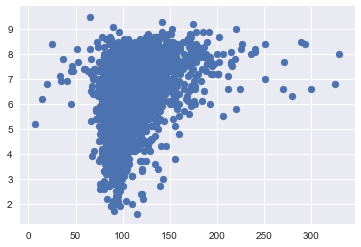

In [38]:
plt.scatter(df_copy['duration'], df_copy['imdb_score'] )

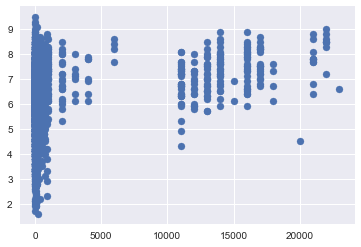

In [39]:
plt.scatter(df_copy['director_facebook_likes'], df_copy['imdb_score'] )

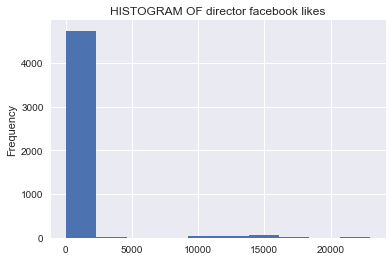

In [40]:
df['director_facebook_likes'].plot(kind='hist', title='HISTOGRAM OF director facebook likes')

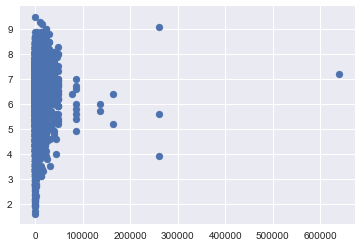

In [41]:
plt.scatter(df_copy['actor_1_facebook_likes'], df_copy['imdb_score'] )

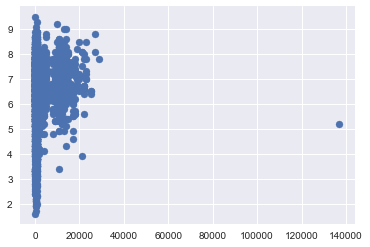

In [42]:
plt.scatter(df_copy['actor_2_facebook_likes'], df_copy['imdb_score'] )


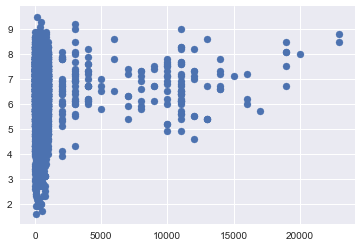

In [43]:
plt.scatter(df_copy['actor_3_facebook_likes'], df_copy['imdb_score'] )

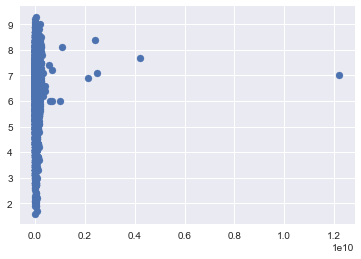

In [44]:
plt.scatter(df_copy['budget'], df_copy['imdb_score'] )

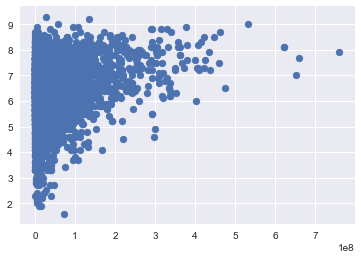

In [45]:
plt.scatter(df_copy['gross'], df_copy['imdb_score'] )

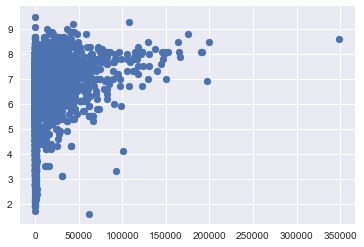

In [46]:
plt.scatter(df_copy['movie_facebook_likes'], df_copy['imdb_score'] )

In [47]:
# Adding actor_1_facebook_likes, actor_2_facebook_likes & actor_3_facebook_likes together and creating one new column 
#actor_facebook_likes_sum.

actor = (df_copy.actor_1_facebook_likes + df_copy.actor_2_facebook_likes + df_copy.actor_3_facebook_likes)

In [48]:
df_copy['actor_facebook_likes_sum'] = actor

In [49]:
#Creating one new dataframe df_lm having only my input independent and dependent output variables.

df_lm=df_copy[['director_facebook_likes','actor_facebook_likes_sum','duration','imdb_score']].copy()

In [50]:
df_lm.sort_values('imdb_score',ascending=False).head()

,director_facebook_likes,actor_facebook_likes_sum,duration,imdb_score
2765,0.0,1125.0,65.0,9.5
1937,0.0,12206.0,142.0,9.3
3466,0.0,27000.0,175.0,9.2
4409,134.0,260808.0,90.0,9.1
2837,0.0,39000.0,220.0,9.0


In [51]:
# split into a training and testing set. Selecting 30% for testing the Linear regression Model.

y = df_lm['imdb_score']

X = df_lm[['director_facebook_likes','actor_facebook_likes_sum','duration']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=110)


In [52]:
#Selecting 1473 records for model testing and 3435 records for training the model.

{'X_train_rows': len(X_train), 'y_train_rows': len(y_train), 'X_test_rows': len(X_test), 'y_test_rows': len(y_test)}


{'X_test_rows': 1473,
 'X_train_rows': 3435,
 'y_test_rows': 1473,
 'y_train_rows': 3435}

In [53]:
#Developing Liear Regression Model to predict IMDB_Score.


# Create linear regression object
regr = linear_model.LinearRegression()

# Start the Time to track the model training time
start_time = timeit.default_timer()

# Train the model using the training sets
regr.fit(X_train, y_train)

#Printing the Model Train Time
print("Training the Model time: " + str(timeit.default_timer() - start_time))

start_time = timeit.default_timer()

#Predicting the target variable from test.
y_pred = regr.predict(X_test)

#Printing the Model output predit Time based on test data.
print("Predicting time: " + str(timeit.default_timer() - start_time))

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((y_pred - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))





Training the Model time: 0.0015221859790723114
Predicting time: 0.00046936699406560645
Coefficients: 
 [  4.57589045e-05   3.61228110e-06   1.51850886e-02]
Mean squared error: 1.09
Variance score: 0.14


([], <a list of 0 Text yticklabel objects>)

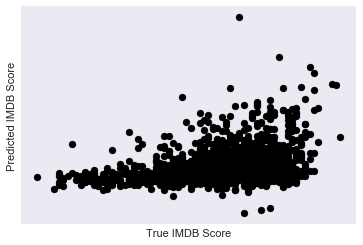

In [54]:
# Plot outputs
plt.scatter(y_test, y_pred,  color='black')
plt.xlabel('True IMDB Score')
plt.ylabel('Predicted IMDB Score')
#plt.plot(X_test, y_pred, color='blue',
#         linewidth=3)

plt.xticks(())
plt.yticks(())

# Evaluating the Model
Lets evaluate our model performance by calculating the residual sum of squares and explained variance score(R^2).

Calculate the Mean Absolute error, Mean squared error and the Root mean squared error.

In [55]:
print('MAE:  %.2f' %metrics.mean_absolute_error(y_test, y_pred))
print('MSE:  %.2f' %metrics.mean_squared_error(y_test, y_pred))
print('RMSE: %.2f' %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  0.81
MSE:  1.09
RMSE: 1.05


In [56]:
print('EVS: %.2f' %metrics.explained_variance_score(y_test, y_pred))

EVS: 0.14


# Residuals

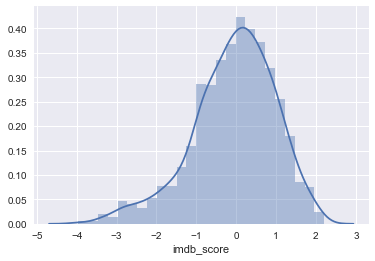

In [57]:
sns.distplot(y_test-y_pred, bins=25)

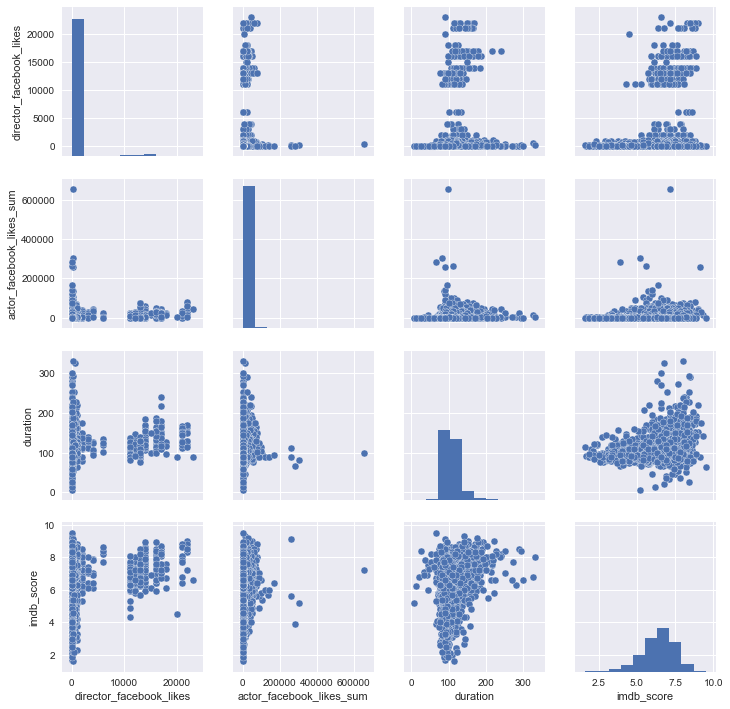

In [58]:
sns.pairplot(df_lm)

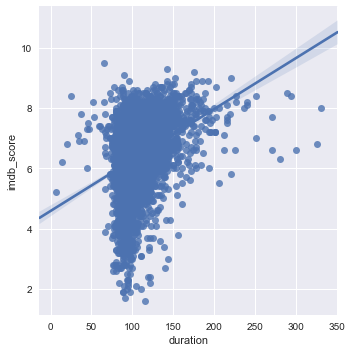

In [59]:
sns.lmplot(x='duration',y='imdb_score',data=df_lm)

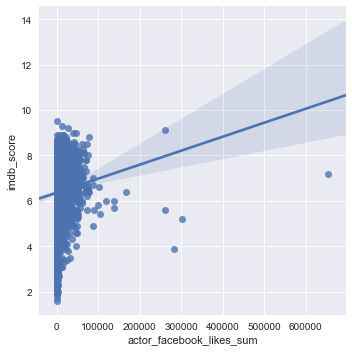

In [60]:
sns.lmplot(x='actor_facebook_likes_sum',y='imdb_score',data=df_lm)

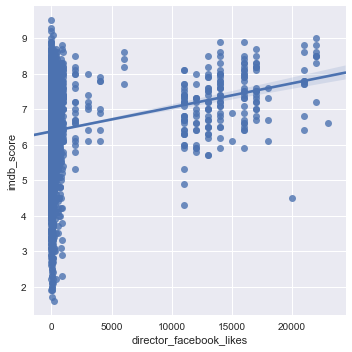

In [61]:
sns.lmplot(x='director_facebook_likes',y='imdb_score',data=df_lm)

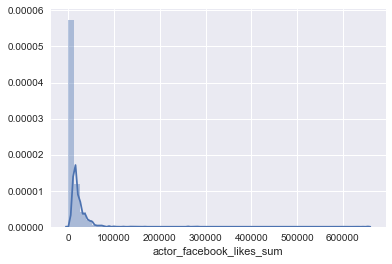

In [66]:
sns.distplot(df_lm['actor_facebook_likes_sum'])

In [72]:
(y_pred-y_test).sort_values(ascending=False)

319     3.961863
5020    3.905071
1702    3.555455
3923    3.491910
2182    3.340809
2066    3.339578
3018    3.286854
4525    3.284649
4472    3.281260
1998    3.275139
620     3.241516
2328    3.158277
3445    3.112714
2511    2.987116
1303    2.978500
4083    2.976776
1144    2.938213
3197    2.914633
4005    2.914250
4658    2.905846
4704    2.870398
2890    2.864510
1934    2.849172
2935    2.849041
4769    2.849041
4820    2.819396
4766    2.816363
5017    2.806011
4963    2.777217
3676    2.774785
          ...   
3870   -1.794681
927    -1.798363
4157   -1.808443
4951   -1.810649
2651   -1.811859
2133   -1.813327
1008   -1.817732
4706   -1.836104
4105   -1.844242
4263   -1.847137
3373   -1.850495
3117   -1.852946
3318   -1.881694
2493   -1.904231
1171   -1.904231
4444   -1.906197
338    -1.919327
4274   -1.922197
4034   -1.932378
4920   -1.938501
4914   -1.943568
4585   -2.009383
4286   -2.013672
3486   -2.022416
2870   -2.026593
4409   -2.054560
4687   -2.064161
3849   -2.1127